Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

Prediction: 🧠 Demented (Confidence: 0.79)


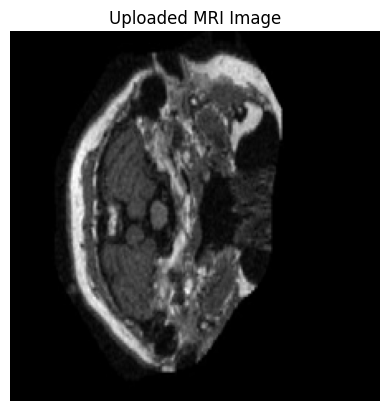

In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Configuration
MODEL_PATH = "alzheimer_model_fedprox_4Clients.keras"  # Path to the trained model
IMAGE_PATH = "D:/LOHITH_NEW/archive/Data/Demented/OAS1_0003_MR1_mpr-1_100.jpg"  # Path to your MRI image
TARGET_SIZE = (224, 224)

# ----------- Load the Model ----------- 
def load_model_for_evaluation():
    model = load_model(MODEL_PATH)
    print("Model loaded successfully.")
    return model

# ----------- Preprocess the Image ----------- 
def preprocess_image(image_path):
    # Open the image, convert to grayscale, resize it to the model's expected input size
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(TARGET_SIZE)
    
    # Convert to a numpy array and normalize
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]
    
    # The model expects (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension (224, 224, 1)
    img_array = np.repeat(img_array, 3, axis=-1)    # Convert to 3 channels (224, 224, 3)
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 224, 224, 3)
    
    return img_array, img

# ----------- Prediction ----------- 
def predict(model, img_array):
    pred = model.predict(img_array)[0][0]  # Get prediction (single value)
    label = "🧠 Demented" if pred < 0.5 else "✅ Non-Demented"
    confidence = f"{pred:.2f}" if pred > 0.5 else f"{1 - pred:.2f}"
    return label, confidence

# ----------- Main Evaluation ----------- 
def main():
    # Load model
    model = load_model_for_evaluation()

    # Preprocess the image
    img_array, img_display = preprocess_image(IMAGE_PATH)
    
    # Make prediction
    label, confidence = predict(model, img_array)

    # Print prediction results
    print(f"\nPrediction: {label} (Confidence: {confidence})")
    
    # Display the image
    plt.imshow(img_display, cmap='gray')
    plt.title("Uploaded MRI Image")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()
